## Matplotlib 

In this notebook we will go through and practice all the important functional plots, how to style them, how to make them interactive, animate them, and much more.

We will start from the most basic topics and move to more complicated ones as we move forward in the notebook.

In [3]:
## first the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## adding this to allow reloading the notebook
%reload_ext autoreload
%autoreload 2

### 1. Basic Plots

Text(0, 0.5, '$\\sin(x)$')

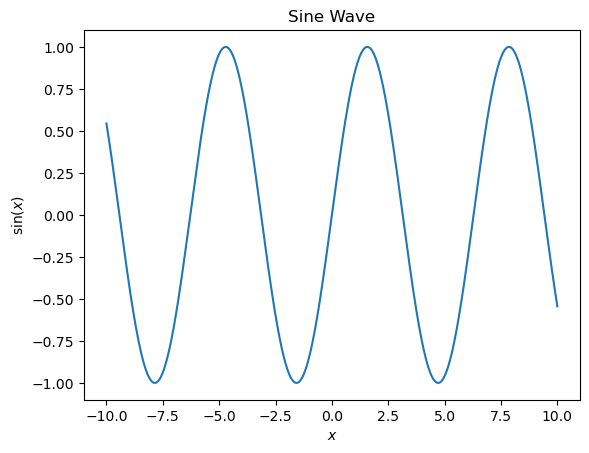

In [9]:
## creating some data to plot
x = np.linspace(-10, 10, 10000)
y = np.sin(x)
## and simply plotting them
plt.plot(x, y)
plt.title('Sine Wave')
plt.xlabel(r'$x$')
plt.ylabel(r'$\sin(x)$')

### 2. Multiple Plots

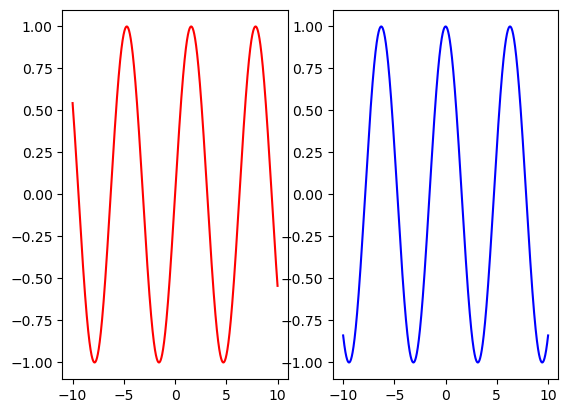

In [11]:
## creating more than one plot
## first working on the 1st plot
## in out two column plot set
plt.subplot(1, 2, 1)
plt.plot(x, y, 'r')
## and then the 2nd plot in the set
plt.subplot(1, 2, 2)
plt.plot(x, np.cos(x), 'b')

### 3. Working with Figure Object

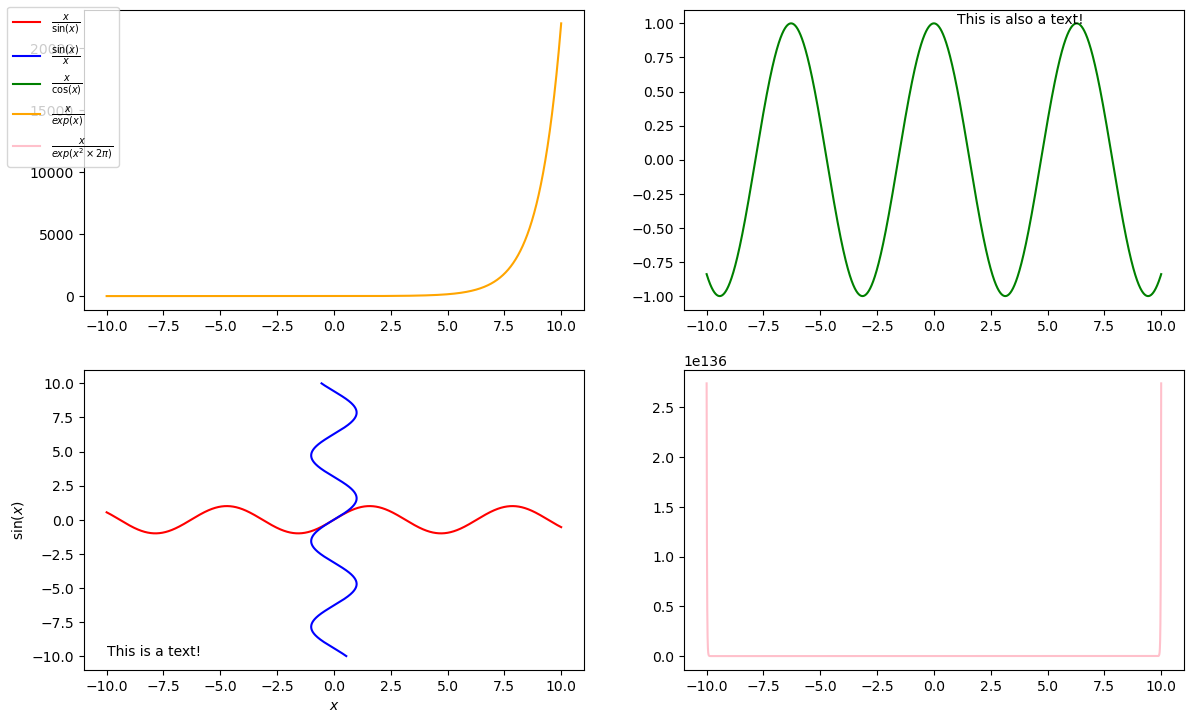

In [61]:
## one figure can contain multiple axes
## and we can create a figure the following way
## and pass the size in inches
## and the resolution of our plot
fig = plt.figure(figsize = (10, 6), dpi = 100)
## and then move on to add objects to our figure
## witht the location and the portion of our figure that it'll take up
ax = fig.add_axes([0.0,0.0, 0.5,0.5])
ax2 = fig.add_axes([0.6, 0.6, 0.5, 0.5])
ax3 = fig.add_axes([0.0, 0.6, 0.5, 0.5])
ax4 = fig.add_axes([0.6, 0.0, 0.5, 0.5])
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\sin(x)$')
ax.plot(x, y, label = r'$\frac{x}{\sin(x)}$', color = 'r')
ax.plot(y, x, label = r'$\frac{\sin(x)}{x}$', color = 'b')
ax2.plot(x, np.cos(x), label = r'$\frac{x}{\cos(x)}$', color = 'g')
ax3.plot(x, np.exp(x), label = r'$\frac{x}{exp(x)}$', color='orange')
ax4.plot(x, np.exp(x ** 2 * np.pi), label = r'$\frac{x}{exp(x^2\times2\pi)}$', color='pink')
## we can also add a text to our figures
## where 0, 0  is the center of the axes
ax.text(-10, -10, 'This is a text!')
ax2.text(1, 1, 'This is also a text!')
## legends can be located at 
## upper right, upper left, lower right, and lower left
## we can also supply a (x, y) coordinate for the location
fig.legend(loc='upper left')

### 4. Working with Subplots

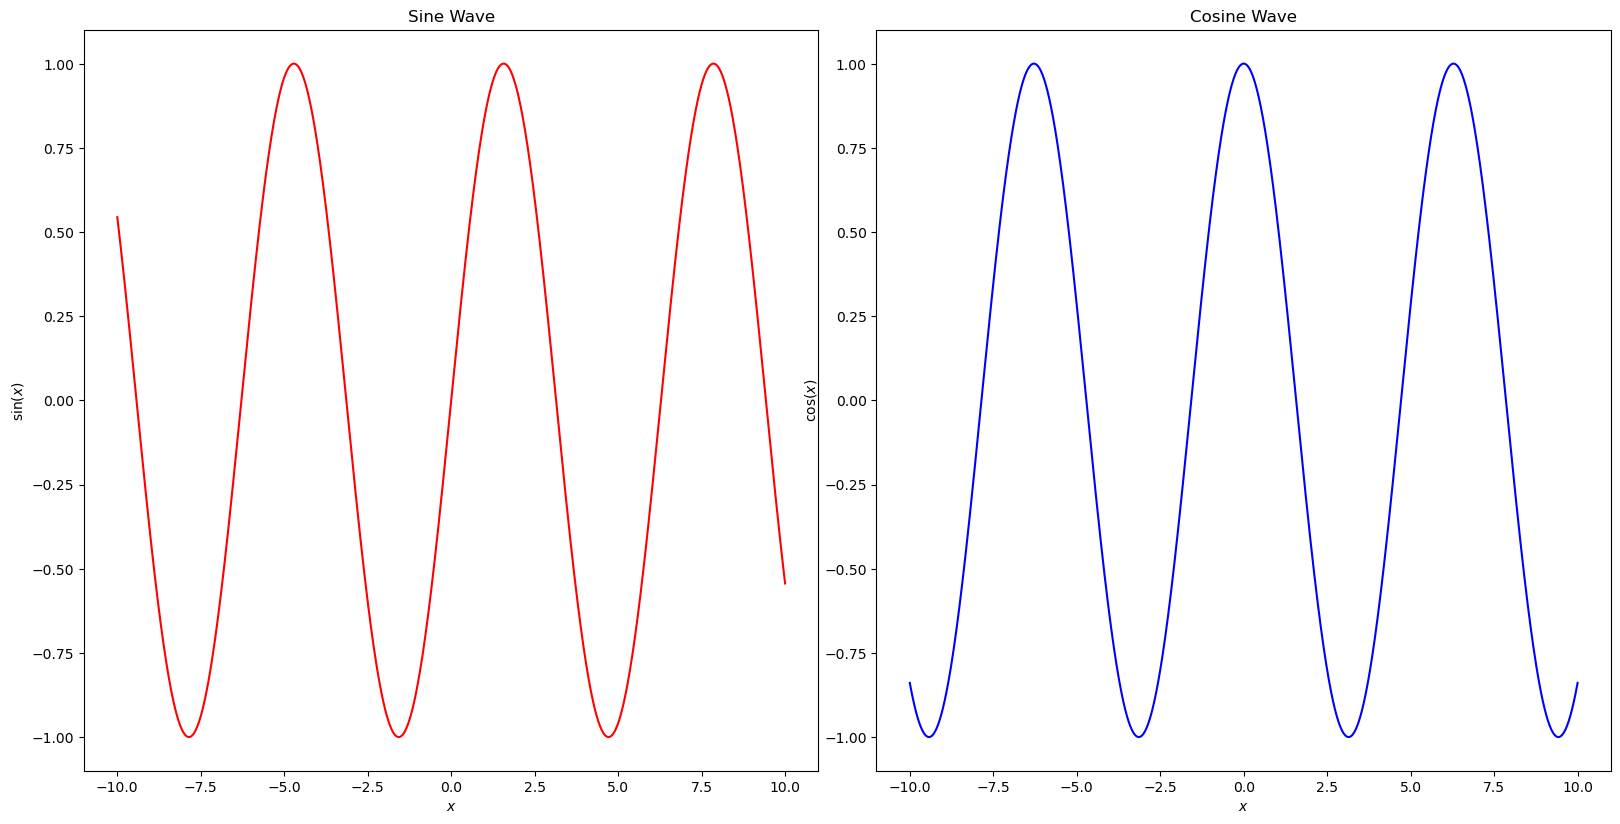

In [64]:
## we can simply create multiple plots at once
fig, ax = plt.subplots(figsize = (16, 8), nrows = 1, ncols = 2)
## this will help if you have overlaping plots
fig.tight_layout()
## and then we can access each axes by its index
ax[0].set_title('Sine Wave')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$\sin(x)$')
ax[0].plot(x, np.sin(x), 'r')
ax[1].set_title('Cosine Wave')
ax[1].set_xlabel(r'$x$')
ax[1].set_ylabel(r'$\cos(x)$')
ax[1].plot(x, np.cos(x), 'b')

### 5. Styling the Plots

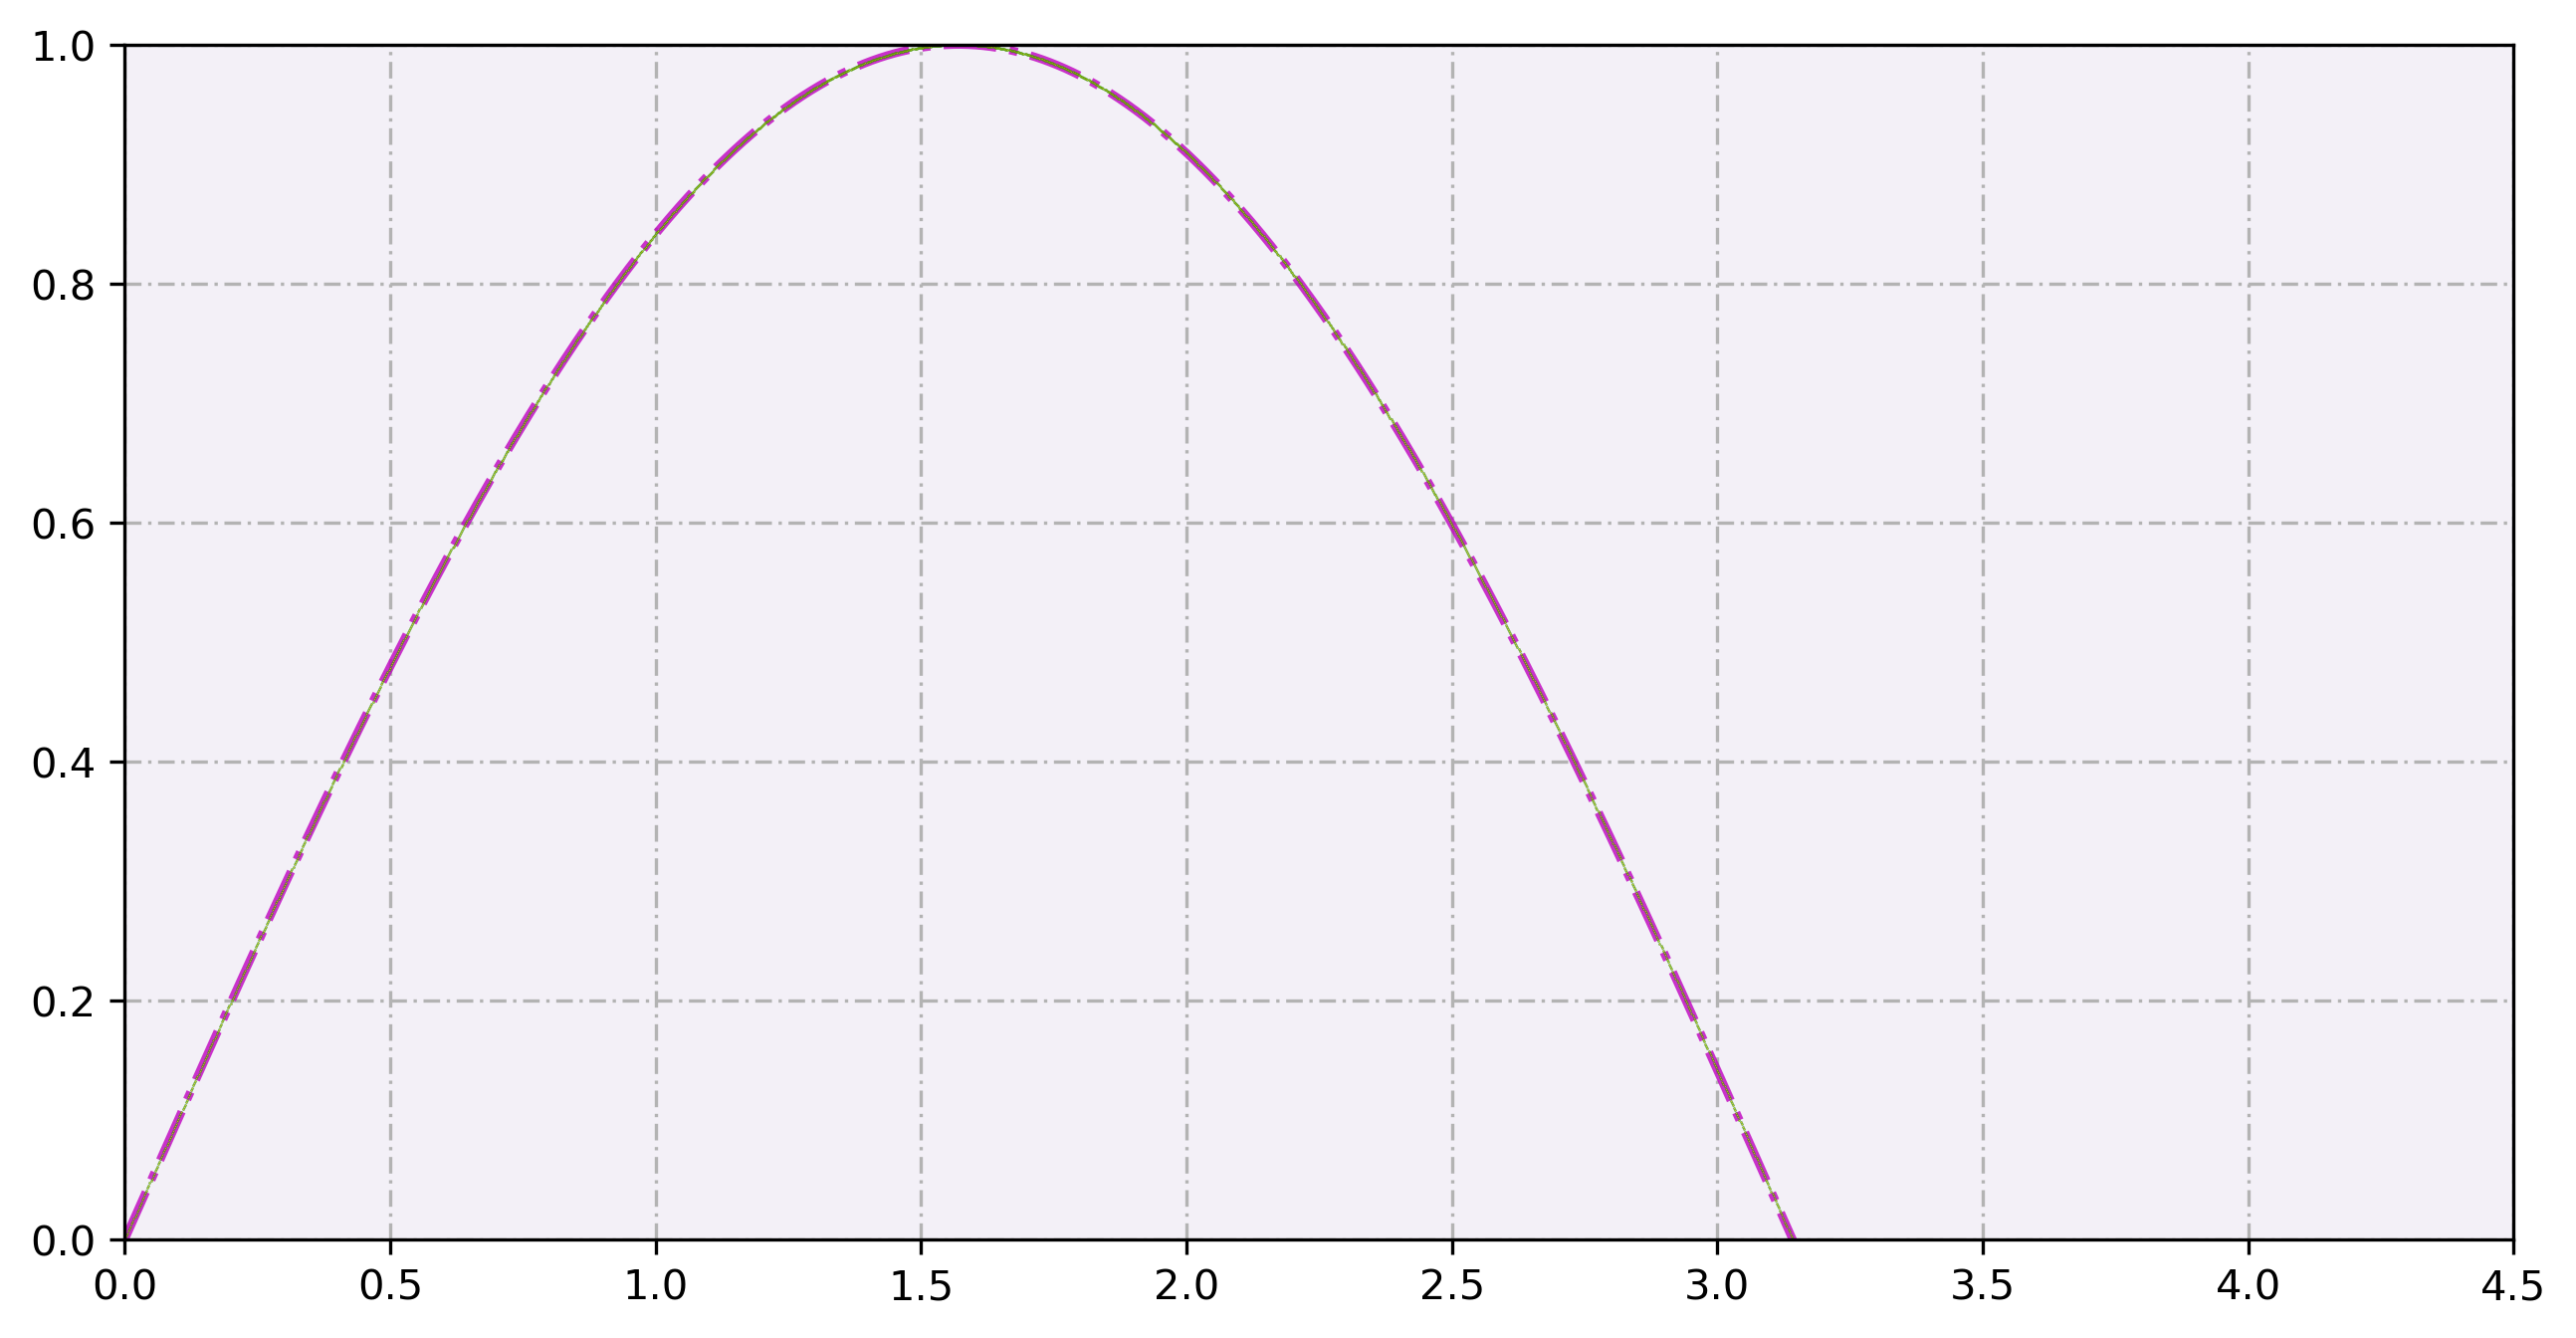

In [85]:
## default colors available are
## r:red, b:blue, g:green, y:yellow, c:cyan, 
## m:magenta, k:black, w:white
## color = "0.75" creates a 75% grey
## we can use hexcodes like "#eeefff"
## the other option is to use the full color name
fig = plt.figure(figsize = (16, 8), dpi=300)
ax = fig.add_axes([0.0, 0.0, 0.5, 0.5])
## ls is for line style
## lw is line width, default to 1
## marker will use the passed in style to 
## point out the x, and y values
ax.plot(x, y, color='m', ls='-.', lw=2, alpha=0.8,
       marker='o', markerfacecolor='y', markeredgecolor='g',
       markersize=0.5, markeredgewidth=0.1)
## we can also give x and y limit to our chart
ax.set_xlim([0,4.5])
ax.set_ylim([0,1])
## we can also add a customized grid
ax.grid(True, color='0.7', dashes=(5,2,1,2))
## and have a background color as well
ax.set_facecolor('#f3f0f7')

### 6. Working with Pandas DF

Text(1350, 2.89, 'an outlier')

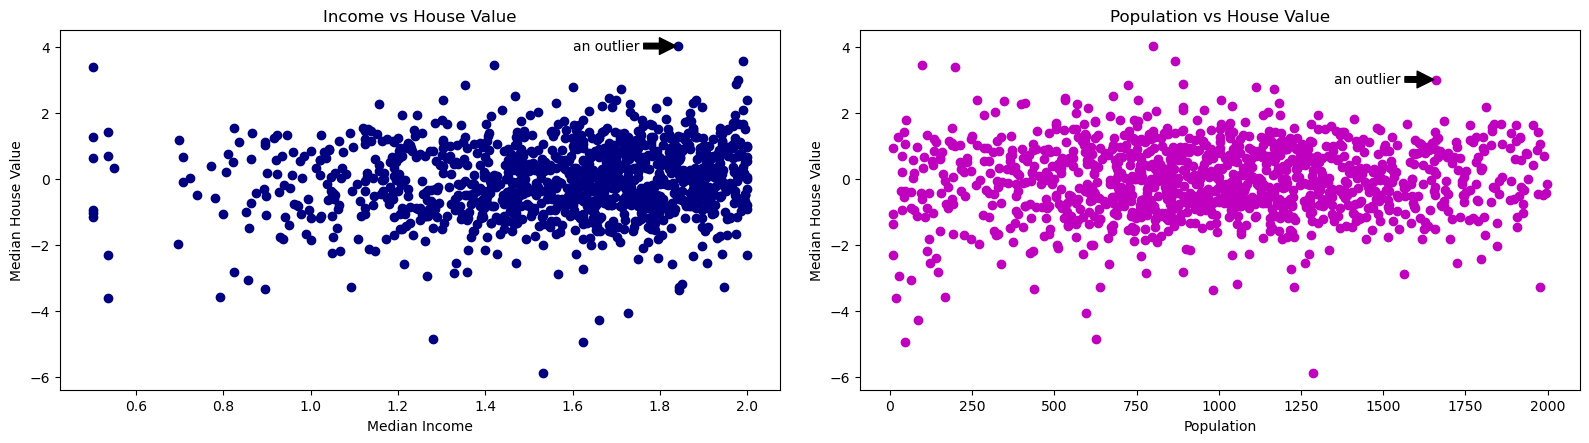

In [131]:
## using our housing value data
housing_df = pd.read_csv('C:\\Users\\12145\\Documents\\GitHub\\Python\\data\\housing.csv')
housing_df = housing_df[(housing_df.median_income <= 2) & (housing_df.population <= 2000) &
                        (housing_df.median_house_value <= 100000)]
housing_df['norm_house_value'] = housing_df.median_house_value.transform(lambda x: (x - x.rolling(80).mean())/x.rolling(80).std())
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_axes([0,0, 0.45,0.45])
ax2 = fig.add_axes([0.5, 0, 0.45,0.45])
ax1.scatter(housing_df.sort_values('median_income').median_income, housing_df.sort_values('median_income').norm_house_value,
        color='navy')
ax1.set_title('Income vs House Value')
ax1.set_xlabel('Median Income')
ax1.set_ylabel('Median House Value')
## we can add annotations as well
ax1.annotate('an outlier', xy=(1.8419, 4.019798), xytext=(1.6, 3.90),
            arrowprops=dict(facecolor='k', shrink=0.05))

ax2.scatter(housing_df.sort_values('population').population, housing_df.sort_values('population').norm_house_value,
        color='m')
ax2.set_title('Population vs House Value')
ax2.set_xlabel('Population')
ax2.set_ylabel('Median House Value')
ax2.annotate('an outlier', xy=(1659.0,3.003073), xytext=(1350, 2.89),
            arrowprops=dict(color='k', shrink=0.05))


### 7. Working with Histograms

(array([0.00098229, 0.00073672, 0.00196458, 0.00442031, 0.01203306,
        0.0189091 , 0.0324156 , 0.04395752, 0.06998822, 0.08644159,
        0.1124723 , 0.12646995, 0.12917125, 0.11885719, 0.11836605,
        0.10510512, 0.07661869, 0.06335776, 0.0405195 , 0.02774972,
        0.01694452, 0.01105077, 0.00466588, 0.00245573, 0.00221015]),
 array([-0.50999833,  0.30442441,  1.11884715,  1.9332699 ,  2.74769264,
         3.56211538,  4.37653813,  5.19096087,  6.00538362,  6.81980636,
         7.6342291 ,  8.44865185,  9.26307459, 10.07749733, 10.89192008,
        11.70634282, 12.52076556, 13.33518831, 14.14961105, 14.96403379,
        15.77845654, 16.59287928, 17.40730202, 18.22172477, 19.03614751,
        19.85057026]),
 <BarContainer object of 25 artists>)

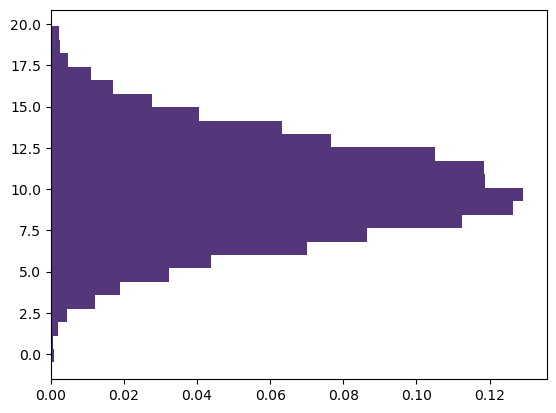

In [148]:
## lets create a normal distribution
## with mean of 10 & std of 3
norm_dist = np.random.normal(10, 3, 5000)
## creating a histogram is fairly simple
## we can customize the # of bins
## if we want it to be a density instead of frequency
## we can also modify the range for bins
## or make it a cumulative plot instead
## or have line instead of bars with histtype='step'
plt.hist(norm_dist, bins = 25, density = True, color='#53377a',
        orientation='horizontal')

### 8. Working with Bar Charts

Text(0, 0.5, 'Votes')

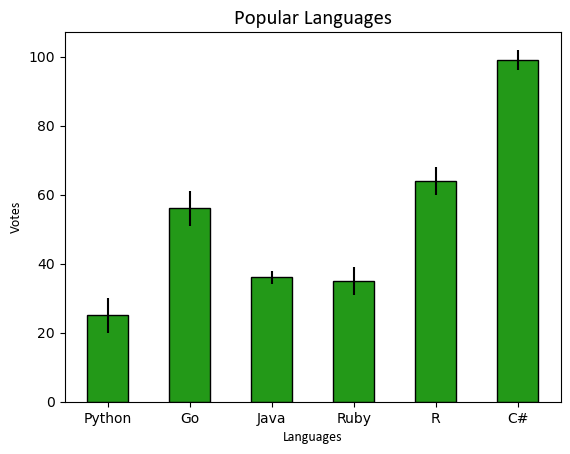

In [170]:
## lets create a categorical sample
langs = np.array(['Python', 'Go', 'Java', 'Ruby', 'R', 'C#'])
vals = np.random.randint(20, 101, langs.shape[0])
var = np.random.randint(2, 6, langs.shape[0])
## yerr will add a variance bar to each category
## barh will create a horizantal bar chart
plt.bar(langs, vals, color = '#239918', yerr=var, edgecolor='k',
       width = 0.5)
plt.title('Popular Languages', fontname='Calibri', fontsize = 15)
plt.xlabel('Languages', fontname='Calibri', fontsize = 10)
plt.ylabel('Votes', fontname='Calibri', fontsize = 10)

### 9. Working with Pie Charts

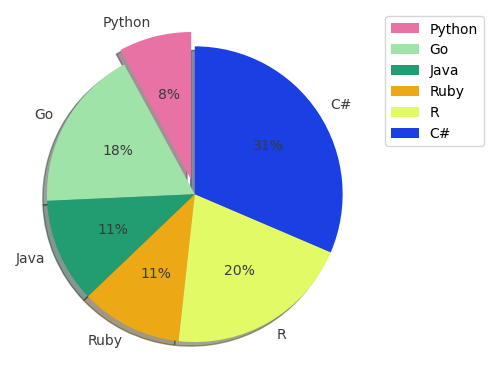

In [214]:
## we will be using our language data again
## but we want to create random colors for them
colors = [(np.random.random(1)[0], np.random.random(1)[0], np.random.random(1)[0]) for _ in range(langs.shape[0])]
## and also pick one to explode
explode = [0] * langs.shape[0]
explode[np.random.randint(0, langs.shape[0] - 1, 1)[0]] = 0.1
## we pass in our labels, random colors, and randomly explode one piece
## and also pass in the floating point values for the %
## we can also add a shadow to our pie chart
## the start angle and the text properties can also be modified
wedges, texts, autotexts = plt.pie(vals, labels=langs, colors=colors, explode = explode, autopct = '%1.0f%%',
                                  shadow = True, startangle = 90, textprops = dict(color = '#393b39'))
## and adding a legend to the right outside
plt.legend(wedges, langs, loc = 'upper right', bbox_to_anchor = (1, 0, 0.3, 1))

### 10. Working with Timeseries

[*********************100%%**********************]  1 of 1 completed


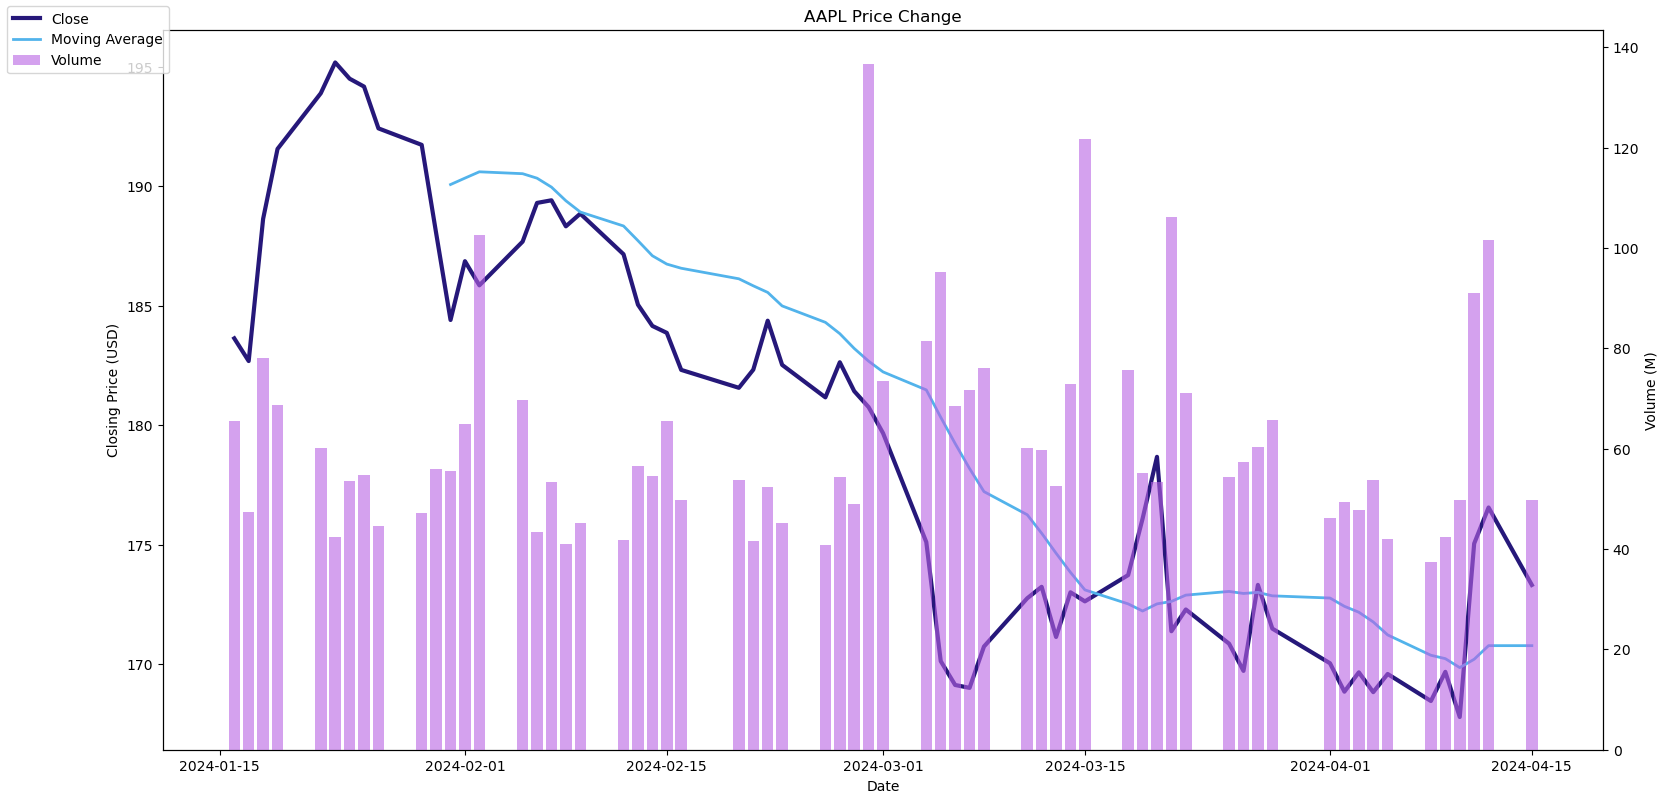

In [249]:
## lets download some stock data from yahoo finance
import yfinance as yf
ticker = 'AAPL'
stock_data = yf.download(tickers = ticker, period = '3mo', interval='1d')
stock_data['MA12'] = stock_data.Close.rolling(12).mean()
fig = plt.figure(figsize = (16, 8 ))
ax = fig.add_axes([0.1,0.1, .9, .9])
ax.plot(stock_data.index, stock_data.Close, color = '#26187a', label='Close', lw =3)
ax.plot(stock_data.index, stock_data.MA12, color = '#52b3eb', label='Moving Average', lw=2 )
## creating a shared x-axis
ax1 = ax.twinx()
## and then using the second ax for our volume
## since they're in different scales
ax1.bar(stock_data.index, stock_data.Volume/10**6, color = '#b862e3', label = 'Volume', alpha = .6)
## having the second axis to have a specific label
ax1.set_ylabel('Volume (M)')
ax.set_title(f'{ticker} Price Change')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price (USD)')
fig.legend(loc='upper left')

### 11. Working with Tables

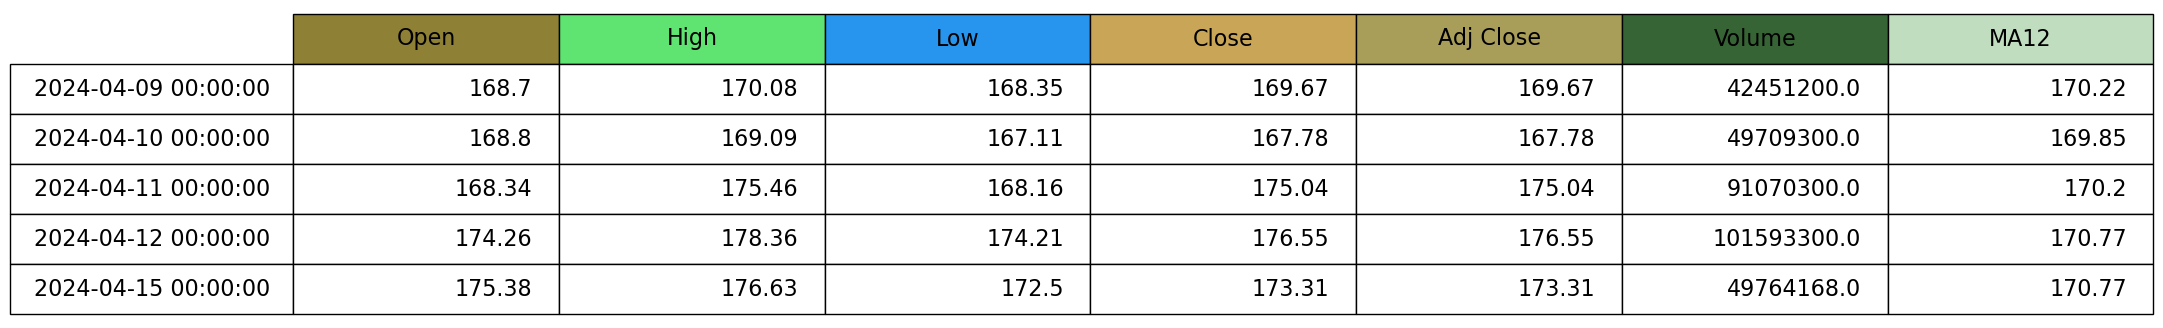

In [280]:
## rounding up the numbers
for col in stock_data.columns:
    stock_data[col] = round(stock_data[col], 2)
## modifying the figure object
plt.figure(figsize = (8, 4), linewidth=2, tight_layout=dict(pad=.5))
## getting rid of the lines around the fig
## this part gets rid of the ticks and values on each axis
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
## and this part removes the box around the figure
plt.box(on=None)
## generating some random colors for columns
colors = [(np.random.random(1)[0],np.random.random(1)[0],np.random.random(1)[0]) for _ in range(stock_data.shape[1])]
## only getting the most recent data
table = plt.table(cellText = stock_data.iloc[-5:].to_numpy(), loc='center', colLabels=stock_data.columns,
         rowLabels = stock_data.iloc[-5:].index, rowLoc='center', colLoc='center', colColours=colors)
## changing the font size and scale
table.set_fontsize(16)
table.scale(3, 3)

In [275]:
stock_data.to_numpy()

array([[1.8216000e+02, 1.8426000e+02, 1.8093000e+02, 1.8363000e+02,
        1.8340000e+02, 6.5603000e+07,           nan],
       [1.8127000e+02, 1.8293000e+02, 1.8030000e+02, 1.8268000e+02,
        1.8245000e+02, 4.7317400e+07,           nan],
       [1.8609000e+02, 1.8914000e+02, 1.8583000e+02, 1.8863000e+02,
        1.8839000e+02, 7.8005800e+07,           nan],
       [1.8933000e+02, 1.9195000e+02, 1.8882000e+02, 1.9156000e+02,
        1.9132000e+02, 6.8741000e+07,           nan],
       [1.9230000e+02, 1.9533000e+02, 1.9226000e+02, 1.9389000e+02,
        1.9364000e+02, 6.0133900e+07,           nan],
       [1.9502000e+02, 1.9575000e+02, 1.9383000e+02, 1.9518000e+02,
        1.9493000e+02, 4.2355600e+07,           nan],
       [1.9542000e+02, 1.9638000e+02, 1.9434000e+02, 1.9450000e+02,
        1.9425000e+02, 5.3631300e+07,           nan],
       [1.9522000e+02, 1.9627000e+02, 1.9311000e+02, 1.9417000e+02,
        1.9392000e+02, 5.4822100e+07,           nan],
       [1.9427000e+02, 1